In [1]:
import ibm_db

In [2]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "pzs47640"        # e.g. "abc12345"
dsn_pwd = "fkcqwh@gtvwbkqbd"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [3]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=pzs47640;PWD=fkcqwh@gtvwbkqbd;


In [4]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  pzs47640 on host:  dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net


In [5]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [6]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           libdb2.a
DRIVER_VER:            11.01.0303
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1208
CONN_CODEPAGE:         1208


In [8]:
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from CUSTOMER"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only) - replace ... with your code
...
ibm_db.fetch_both(selectStmt)

{'CUSTOMER_ID': 1,
 0: 1,
 'AGE': 41,
 1: 41,
 'EDU': 2,
 2: 2,
 'YEARS_EMPLOYED': 6,
 3: 6,
 'INCOME': 19,
 4: 19,
 'CARD_DEBT': '0.124',
 5: '0.124',
 'OTHER_DEBT': '1.073',
 6: '1.073',
 'DEFAULTED': 0,
 7: 0,
 'ADDRESS': 'NBA001',
 8: 'NBA001',
 'DEBTINCOMERATIO': '6.3',
 9: '6.3'}

In [9]:
import pandas
import ibm_db_dbi

In [10]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [12]:
#query statement to retrieve all rows in INSTRUCTOR table
selectQuery = "select * from CUSTOMER"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

#print just the CUSTOMER_ID for first row in the pandas data frame
pdf



,CUSTOMER_ID,AGE,EDU,YEARS_EMPLOYED,INCOME,CARD_DEBT,OTHER_DEBT,DEFAULTED,ADDRESS,DEBTINCOMERATIO
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [13]:
ibm_db.close(conn)

True

In [14]:
!pip install ipython-sql



     |████████████████████████████████| 40kB 7.2MB/s eta 0:00:011
  Stored in directory: /home/dsxuser/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable


In [15]:
%load_ext sql


In [17]:

%sql ibm_db_sa://pzs47640:XXXXXXXXXXXXXX@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB

In [18]:
Age=50
%sql select * from customer where Age >= :Age

 * ibm_db_sa://pzs47640:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


customer_id,age,edu,years_employed,income,card_debt,other_debt,defaulted,address,debtincomeratio
54,56,1,19,66,0.847,1.331,None,NBA026,3.3
60,50,1,11,36,0.835,0.893,0,NBA005,4.8
176,53,1,0,27,2.754,5.049,1,NBA026,28.9
180,52,1,19,89,0.397,3.786,0,NBA025,4.7
198,52,1,24,64,3.930,2.470,0,NBA014,10.0
206,51,1,10,44,4.960,0.848,1,NBA001,13.2
227,50,3,18,102,5.782,8.600,0,NBA027,14.1
255,51,3,16,82,2.605,1.003,0,NBA025,4.4
266,55,1,3,40,0.563,2.637,1,NBA011,8.0
282,50,1,30,150,13.553,35.197,None,NBA008,32.5


In [19]:
address_data=%sql select address, count(address)as Count from customer group by address
address_data

 * ibm_db_sa://pzs47640:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


address,COUNT
NBA000,60
NBA001,71
NBA002,71
NBA003,55
NBA004,58
NBA005,43
NBA006,50
NBA007,41
NBA008,49
NBA009,45


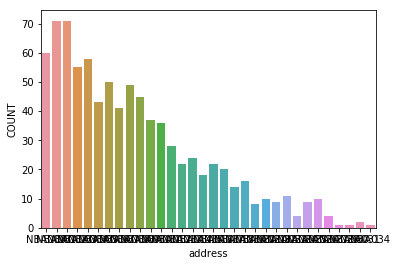

In [20]:
dataframe = address_data.DataFrame()
%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
!pip install seaborn
import seaborn

plot = seaborn.barplot(x='address',y='COUNT', data=dataframe)


In [136]:
age_data=%sql select age, count(age)as Count from customer group by age
age_data


 * ibm_db_sa://pzs47640:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


age,COUNT
20,2
21,12
22,14
23,21
24,30
25,25
26,30
27,33
28,38
29,51


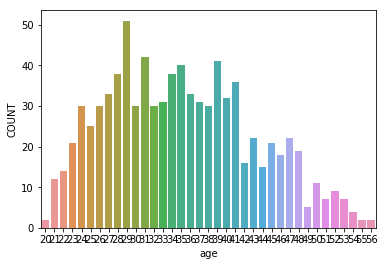

In [137]:

dataframe = age_data.DataFrame()
%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
!pip install seaborn
import seaborn

plot = seaborn.barplot(x='age',y='COUNT', data=dataframe)

In [122]:
%sql select distinct * from (select  cast(substr(address,4,3)as integer) as address  from customer)

 * ibm_db_sa://pzs47640:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


address
0
1
2
3
4
5
6
7
8
9


In [145]:
add_con=%sql select addcode, age,count(age)as count from (select cast(substr(address,4,3)as integer) as addcode,age from customer) group by addcode, age order by 1
add_con

 * ibm_db_sa://pzs47640:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


addcode,age,COUNT
0,20,1
0,21,3
0,22,3
0,23,3
0,24,8
0,25,2
0,26,5
0,27,3
0,28,3
0,29,4


In [22]:
pdf.describe()

,CUSTOMER_ID,AGE,EDU,YEARS_EMPLOYED,INCOME,CARD_DEBT,OTHER_DEBT,DEFAULTED,DEBTINCOMERATIO
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [27]:
df=pdf[['AGE','ADDRESS','CUSTOMER_ID']]
df.head()

,AGE,ADDRESS,CUSTOMER_ID
0,41,NBA001,1
1,47,NBA021,2
2,33,NBA013,3
3,29,NBA009,4
4,47,NBA008,5


In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


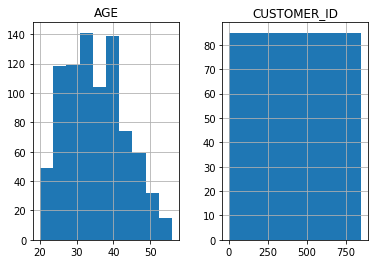

In [28]:
viz=df[['AGE','ADDRESS','CUSTOMER_ID']]
viz.hist()
plt.show()

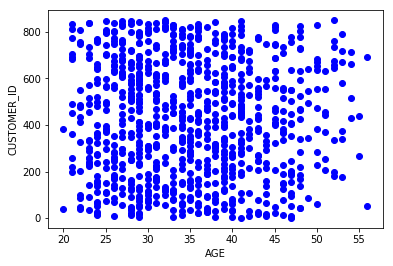

In [30]:
plt.scatter(df.AGE, df.CUSTOMER_ID,  color='blue')
plt.xlabel("AGE")
plt.ylabel("CUSTOMER_ID")
plt.show()

In [31]:
msk = np.random.rand(len(df)) < 0.8
train = pdf[msk]
test = pdf[~msk]

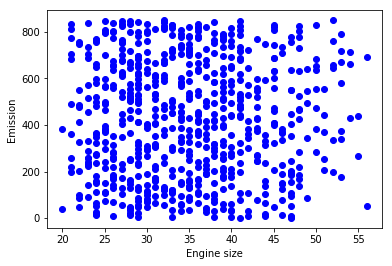

In [35]:
plt.scatter(train.AGE, train.CUSTOMER_ID,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

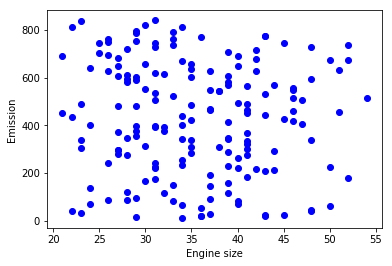

In [34]:
plt.scatter(test.AGE, test.CUSTOMER_ID,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [36]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AGE']])
train_y = np.asanyarray(train[['CUSTOMER_ID']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.32075685]]
Intercept:  [414.09923332]


Text(0, 0.5, 'Emission')

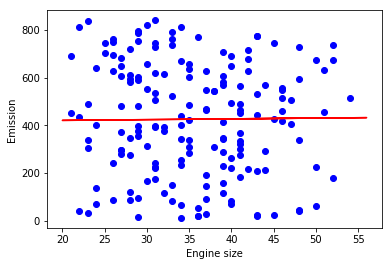

In [38]:
plt.scatter(test.AGE, test.CUSTOMER_ID,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

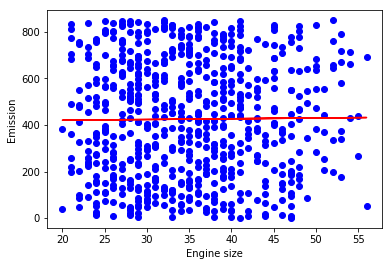

In [39]:
plt.scatter(train.AGE, train.CUSTOMER_ID,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [40]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['AGE']])
test_y = np.asanyarray(test[['CUSTOMER_ID']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 200.66
Residual sum of squares (MSE): 54978.82
R2-score: -8798.83


In [48]:
# simple regressoin
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['AGE','CUSTOMER_ID','INCOME']])
y = np.asanyarray(train[['CUSTOMER_ID']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)


Coefficients:  [[-9.93947516e-16  1.00000000e+00  6.99549382e-16]]


In [49]:
# Multiple regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Age']])
train_y = np.asanyarray(train[['CUSTOMER_ID']])

test_x = np.asanyarray(test[['AGE']])
test_y = np.asanyarray(test[['CUSTOMER_ID']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

KeyError: "None of [Index(['Age'], dtype='object')] are in the [columns]"